<table>
 <tr align=left><td><img align=left src="https://github.com/D-Mayerfeld/intro-numerical-methods/blob/master/images/CC-BY.png?raw=1">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
from __future__ import print_function
from __future__ import absolute_import

%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Numerical Differentiation

**GOAL:**  Given a set of $N+1$ points $(x_i, y_i)$ compute the derivative of a given order to a specified accuracy.

**Approach:** Find the interpolating polynomial $P_N(x)$ and differentiate that.
- This is the approach as you are only given a set of discrete points, but not the function that generated them.

### Newton Polynomials

While the interpolating polynomial $P_N(x)$ through $N+1$ distinct points is unique,  it can be expressed in terms of many bases.

So far we have considered the monomial basis $< 1,x,x^2,\ldots,x^n>$ and the Lagrange basis $\ell_i(x)$

However, for our purposes here it's somewhat more convenient to use the *Newton Polynomial* Basis

\begin{align}
    n_0 &= 1\\
    n_j(x) &= \prod^{j-1}_{i=0} (x - x_i)\quad\mathrm{for}\quad j>0 \\
\end{align}


### Newton Polynomials

Unrolling them, we see
\begin{align}
    n_0(x) &= 1\\
    n_1(x) &= (x-x_0) \\
    n_2(x) &= (x - x_0)(x-x_1)\\
        &\vdots \\
    n_N(x) &= (x - x_0)(x - x_1)\cdots(x-x_{N-1})\\
\end{align}

Note:  The Newton polynomials have some features common to both the monomials and the Lagrange polynomials

* Like the monomials they are monic polynomials of increasing degree in $x$, i.e. $n_2(x)$ is quadratic
* Like the Lagrange polynomials, some Newton polynomials vanish identically at the interpolation points $x_i$.  In particular

$$
    n_j(x_i) = 0 \quad \mathrm{for}\quad j> i
$$

### The Logic Behind the Newton Basis

The Newton polynomial basis, $n_j(x)$, is constructed in a specific way to make the process of finding the interpolating polynomial more straightforward, especially when you add more data points.

The basis polynomials are defined as:
*   $n_0(x) = 1$
*   $n_j(x) = \prod^{j-1}_{i=0} (x - x_i)$ for $j > 0$

This means each subsequent basis polynomial $n_j(x)$ is simply the previous one multiplied by $(x - x_{j-1})$.

**Why does this make sense?**

Consider the interpolating polynomial in the Newton form:
$$P_N(x) = a_0 n_0(x) + a_1 n_1(x) + a_2 n_2(x) + \cdots + a_N n_N(x)$$

When we evaluate this polynomial at the data points $x_i$, something convenient happens due to the structure of the Newton basis:

*   At $x_0$: $P_N(x_0) = a_0 n_0(x_0) = a_0 \cdot 1 = a_0$. Since we want $P_N(x_0) = y_0$, we immediately get $a_0 = y_0$.
*   At $x_1$: $P_N(x_1) = a_0 n_0(x_1) + a_1 n_1(x_1) = a_0 \cdot 1 + a_1 (x_1 - x_0)$. Since we want $P_N(x_1) = y_1$, we have $y_1 = a_0 + a_1 (x_1 - x_0)$. We can then solve for $a_1$: $a_1 = \frac{y_1 - a_0}{x_1 - x_0} = \frac{y_1 - y_0}{x_1 - x_0}$.
*   At $x_2$: $P_N(x_2) = a_0 n_0(x_2) + a_1 n_1(x_2) + a_2 n_2(x_2) = a_0 \cdot 1 + a_1 (x_2 - x_0) + a_2 (x_2 - x_0)(x_2 - x_1)$. Since we want $P_N(x_2) = y_2$, we have $y_2 = a_0 + a_1 (x_2 - x_0) + a_2 (x_2 - x_0)(x_2 - x_1)$. We can then solve for $a_2$.

As you can see, because $n_j(x_i) = 0$ for $j > i$, evaluating the polynomial at $x_i$ only involves the coefficients $a_0, a_1, \ldots, a_i$. This leads to a lower triangular system of equations for the coefficients $a_j$, which can be easily solved sequentially (as shown in the "Becomes the lower triangular system" markdown cell).

**Key Benefit:**

The most significant advantage of the Newton basis is that if you decide to add a new data point $(x_{N+1}, y_{N+1})$ to improve your interpolation, you don't have to recalculate all the previous coefficients $a_0, \ldots, a_N$. You only need to calculate the new coefficient $a_{N+1}$. This is in contrast to the monomial basis or Lagrange basis, where adding a new point requires recalculating all the coefficients. This incremental property makes the Newton basis computationally efficient for adding more data.

### Newton's Form

This last feature makes it convenient to solve for the interpolating polynomial.

$$P_N(x) = \sum^N_{j=0} a_j n_j(x)$$

as the $(N+1)\times (N+1)$ linear system

$$
    P_N(x_i) = y_i\quad\mathrm{for}\quad i=0,\ldots,N
$$

#### Becomes the lower triangular system

$$
\begin{bmatrix}
1 & 0 & 0 & \ldots & 0 \\
1 & (x_1-x_0) & 0 & \ldots & 0 \\
1 & (x_2-x_0) & (x_2-x_0)(x_2-x_1) & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots  \\
1 & n_1(x_n) & n_2(x_n) & \ldots & n_n(x_n) \\
\end{bmatrix}\begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
\vdots \\
a_n \\
\end{bmatrix}=
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
\vdots \\
y_n \\
\end{bmatrix}
$$

Which can be solved sequentially starting with

\begin{align}
    a_0 & = y_0\\
    a_1 & = \frac{y_1 - y_0}{x_1 - x_0} \\
    a_2 & = \frac{y_2 - y_0 - a_1(x_2 - x_0)}{(x_2-x_0)(x_2-x_1)} \\
    &\vdots \\
\end{align}

### The divided differences

The $a_j = [y_0, \ldots, y_j]$ are also known as *the divided differences* which are defined recursively as

$$[y_i] = y_i \quad i \in \{0,\ldots, N+1\}$$

and

$$[y_i, \ldots , y_{i+j}] = \frac{[y_{i+1}, \ldots , y_{i + j}] - [y_{i},\ldots,y_{i+j-1}]}{x_{i+j} - x_{i}} \quad i \in \{0,\ldots,N+1 - j\} \quad j \in \{1,\ldots, N+1\}$$

These formulas are recursively defined but not so helpful, here are a few examples to start out with:

$$[y_0] = y_0$$

$$[y_0, y_1] = \frac{y_1 - y_0}{x_1 - x_0}$$

$$[y_0, y_1, y_2] = \frac{[y_1, y_2] - [y_0, y_1]}{x_{2} - x_{0}} = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0} = \frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)}$$

The benefit of writing a polynomial like this is that it isolates the $x$ dependence (we can easily take derivatives of this form).

In general then $P_N(x)$ can be written in Newton's form as

$$P_N(x) = y_0 + (x-x_0)[y_0, y_1] + (x - x_0) (x - x_1) [y_0, y_1, y_2] + \cdots + (x-x_0) (x-x_1) \cdots (x-x_{N-1}) [y_0, y_1, \ldots, y_{N}]$$

In [2]:
def divided_difference(x, y, N=50):
    """Compute the Nth divided difference using *x* and *y*"""
    if N == 0:
        raise Exception("Reached recursion limit!")

    # Reached the end of the recurssion
    if y.shape[0] == 1:
        return y[0]
    elif y.shape[0] == 2:
        return (y[1] - y[0]) / (x[1] - x[0])
    else:
        return (divided_difference(x[1:], y[1:], N=N-1) - divided_difference(x[:-1], y[:-1], N=N-1)) / (x[-1] - x[0])

def newton_basis(x, x0):
    """ construct newton basis for the interpolating polynomial given interpolation points x0"""
    basis = numpy.ones((len(x0), len(x)))
    for j in range(len(x0)):
        for i in range(j):
            basis[j, :] *= (x - x0[i])
    return basis

def P_newton(x, data):
    """ construct the interpolating polynomial of order N through the N+1 data points data using a Newton basis"""
    P = numpy.zeros(x.shape)
    basis = newton_basis(x, data[:,0])
    for j in range(data.shape[0]):
        P += divided_difference(data[:j + 1, 0], data[:j + 1, 1]) * basis[j, :]

    return P

In [3]:
# Calculate a polynomial in Newton Form
data = numpy.array([[-2.0, 1.0], [-1.5, -1.0], [-0.5, -3.0], [0.0, -2.0], [1.0, 3.0], [2.0, 1.0]])
x = numpy.linspace(-2.0, 2.0, 100)
basis = newton_basis(x, data[:,0])
P = P_newton(x, data)
N = data.shape[0] - 1

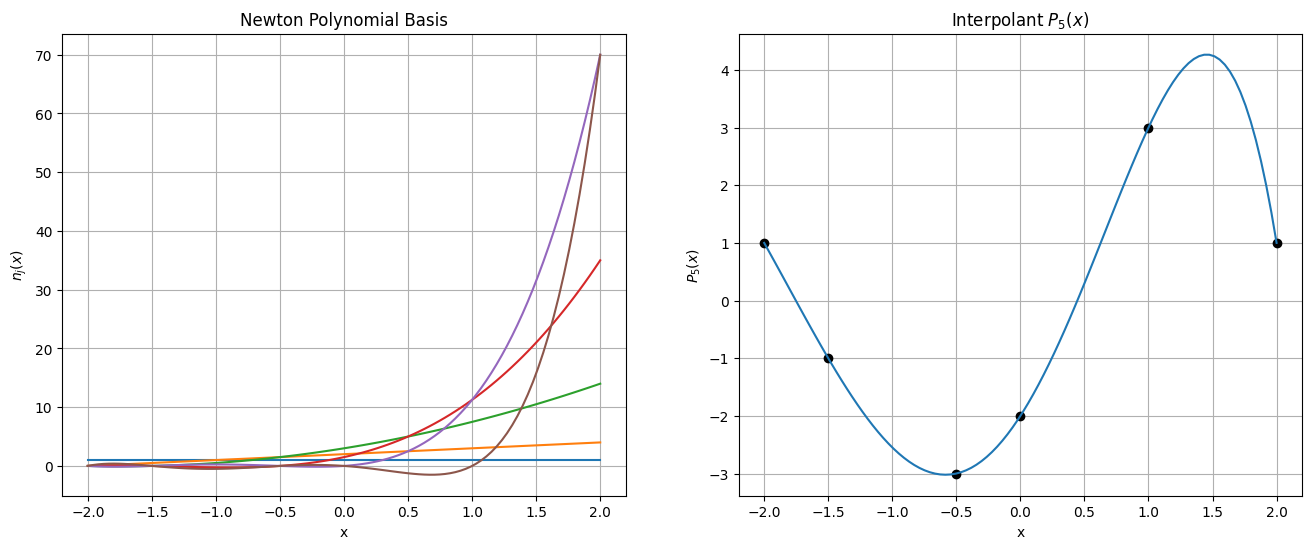

In [4]:
# Plot basis and interpolant
fig = plt.figure(figsize = (16,6))
fig.subplots_adjust(hspace=.5)

axes = [None, None]
axes[0] = fig.add_subplot(1, 2, 1)
axes[1] = fig.add_subplot(1, 2, 2)

for j in range(N + 1):
    axes[0].plot(x, basis[j, :])
    axes[1].plot(data[j, 0], data[j, 1],'ko')
axes[1].plot(x, P)

axes[0].set_title("Newton Polynomial Basis")
axes[0].set_xlabel("x")
axes[0].set_ylabel("$n_j(x)$")
axes[0].grid()

axes[1].set_title("Interpolant $P_%s(x)$" % N)
axes[1].set_xlabel("x")
axes[1].set_ylabel("$P_%s(x)$" % N)
axes[1].grid()

plt.show()

As another concrete example consider the general quadratic polynomial written in Newton's form

$$P_2(x) = [y_0] + (x - x_0) [y_0, y_1] + (x - x_0)(x - x_1) [y_0, y_1, y_2] \\= y_0 + (x - x_0) \frac{y_1 - y_0}{x_1 - x_0} + (x - x_0)(x - x_1) \left ( \frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)} \right )$$

Recall that the interpolating polynomial of degree $N$ through these points is unique!

### Error Analysis

Given $N + 1$ points we can form an interpolant $P_N(x)$ of degree $N$ where

$$f(x) = P_N(x) + R_N(x)$$

And we know from Lagrange's Theorem that the remainder term looks like

$$R_N(x) = (x - x_0)(x - x_1)\cdots (x - x_{N})(x - x_{N+1}) \frac{f^{(N+1)}(c)}{(N+1)!}$$

noting that we need to require that $f(x) \in C^{N+1}$ on the interval of interest.  Taking the derivative of the interpolant $P_N(x)$ then leads to

$$P_N'(x) = [y_0, y_1] + ((x - x_1) + (x - x_0)) [y_0, y_1, y_2] + \cdots + \left(\sum^{N-1}_{i=0}\left( \prod^{N-1}_{j=0,~j\neq i} (x - x_j) \right )\right ) [y_0, y_1, \ldots, y_N]$$

Similarly we can find the derivative of the remainder term $R_N(x)$ as

$$R_N'(x) = \left(\sum^{N}_{i=0} \left( \prod^{N}_{j=0,~j\neq i} (x - x_j) \right )\right ) \frac{f^{(N+1)}(c)}{(N+1)!}$$

Now if we consider the approximation of the derivative evaluated at one of our data points $(x_k, y_k)$ these expressions simplify such that

$$f'(x_k) = P_N'(x_k) + R_N'(x_k)$$

If we let $\Delta x = \max_i |x_k - x_i|$ we then know that the remainder term will be $\mathcal{O}(\Delta x^N)$ as $\Delta x \rightarrow 0$ thus showing that this approach converges and we can find arbitrarily high order approximations (ignoring floating point error).

### Error Analysis - Conceptual Understanding

When we use an interpolating polynomial $P_N(x)$ to approximate a function $f(x)$ based on $N+1$ data points, there's always a difference between the true function and our approximation. This difference is the **error**, often denoted as $R_N(x)$.

The relationship is:
$$f(x) = P_N(x) + R_N(x)$$

Lagrange's Theorem gives us a way to understand and quantify this error. It states that if the original function $f(x)$ is sufficiently smooth (specifically, if it has at least $N+1$ continuous derivatives on the interval of interest), the remainder term (error) can be expressed as:

$$R_N(x) = \frac{f^{(N+1)}(c)}{(N+1)!} \prod_{i=0}^{N} (x - x_i)$$

where $c$ is some point within the interval defined by the data points $x_0, x_1, \ldots, x_N$ and the point $x$ where we are evaluating the error. This formula tells us that the error depends on:

1.  **The $(N+1)$-th derivative of the original function $f^{(N+1)}(c)$:** If the function is "smoother" (its higher-order derivatives are smaller), the error will generally be smaller. If the function is a polynomial of degree $N$ or less, the $(N+1)$-th derivative is zero, and the error is zero (the interpolating polynomial is exact).
2.  **The product of $(x - x_i)$ terms:** This part of the formula shows that the error is zero at the interpolation points $x_i$. The error is generally larger as you move further away from the data points.
3.  **The factorial term $(N+1)!$:** This term in the denominator suggests that as we increase the number of data points (and thus the degree of the interpolating polynomial), the error tends to decrease rapidly, assuming the higher-order derivatives don't grow too quickly.

Now, when we differentiate the interpolating polynomial to approximate the derivative of the original function, we are essentially taking the derivative of $P_N(x)$. The error in this derivative approximation is the derivative of the remainder term, $R_N'(x)$.

$$f'(x) = P_N'(x) + R_N'(x)$$

Analyzing $R_N'(x)$ is more complex, but the key takeaway is that the error in the derivative approximation is related to the $(N+1)$-th derivative of the original function and the spacing of the data points. As the spacing between the data points ($\Delta x$) decreases, the error in the derivative approximation also decreases. The rate at which the error decreases with $\Delta x$ is related to the order of the approximation. For example, a first-order accurate method means the error is proportional to $\Delta x$, while a second-order accurate method means the error is proportional to $\Delta x^2$. This is why shrinking $\Delta x$ is crucial for improving the accuracy of numerical differentiation.

### <font color='red'>Caution</font>

High order does not necessarily imply high-accuracy!

In [5]:
def PN_prime(x, data):
    """ calculate derivative of interpolating polynomail at point x"""
    # General form of derivative of P_N'(x)
    P_prime = numpy.zeros(x.shape)
    newton_basis_prime = numpy.empty(x.shape)
    product = numpy.empty(x.shape)
    N = data.shape[0] - 1
    for n in range(N + 1):
        newton_basis_prime = 0.0
        for i in range(n):
            product = 1.0
            for j in range(n):
                if j != i:
                    product *= (x - data[j, 0])
            newton_basis_prime += product
        P_prime += divided_difference(data[:n+1, 0], data[:n+1, 1]) * newton_basis_prime

    return P_prime

In [6]:
num_points = 4
xmin = -2.
xmax = 2.
data = numpy.empty((num_points, 2))
data[:, 0] = numpy.linspace(xmin, xmax, num_points)
data[:, 1] = numpy.sin(data[:, 0])
x = numpy.linspace(xmin, xmax, 100)
P_prime = PN_prime(x, data)

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-136684401.py:9: SyntaxWarning: invalid escape sequence '\h'
  axes.set_ylabel("$f'(x)$ and $\hat{f}'(x)$")


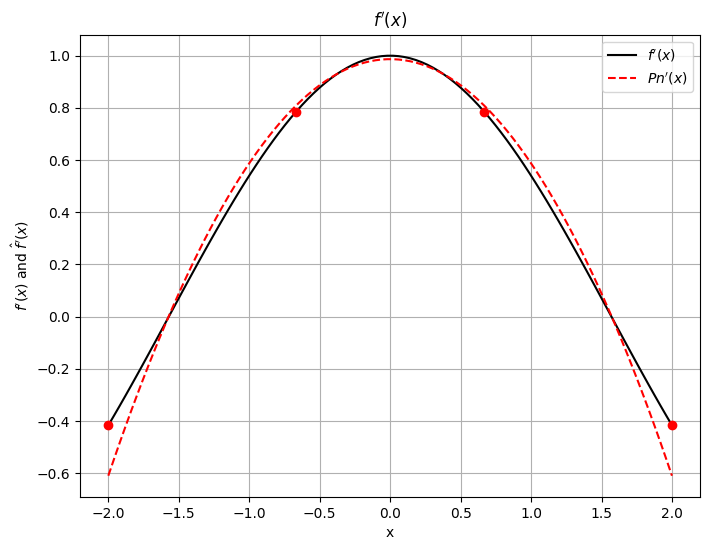

In [7]:
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.cos(x), 'k', label="$f'(x)$")
axes.plot(x, P_prime, 'r--', label="$Pn'(x)$")
axes.plot(data[:,0], numpy.cos(data[:,0]), 'ro')
axes.legend(loc='best')
axes.set_title("$f'(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$f'(x)$ and $\hat{f}'(x)$")
axes.grid()

plt.show()

### Examples

Often in practice we only use a small number of data points to derive a differentiation formula.  In the context of differential equations we also often have $f(x)$ so that $f(x_k) = y_k$ and we can approximate the derivative of a known function $f(x)$.

### Example 1:  1st order Forward and Backward Differences

Using 2 points we can get an approximation that is $\mathcal{O}(\Delta x)$:

$$f'(x) \approx P_1'(x) = [y_0, y_1] = \frac{y_1 - y_0}{x_1 - x_0} = \frac{y_1 - y_0}{\Delta x} = \frac{f(x_1) - f(x_0)}{\Delta x}$$

We can also calculate the error as

$$R_1'(x) = -\Delta x \frac{f''(c)}{2}$$

We can also derive the "forward" and "backward" formulas by considering the question slightly differently.  Say we want $f'(x_n)$, then the "forward" finite-difference can be written as

$$f'(x_n) \approx D_1^+ = \frac{f(x_{n+1}) - f(x_n)}{\Delta x}$$

and the "backward" finite-difference as

$$f'(x_n) \approx D_1^- = \frac{f(x_n) - f(x_{n-1})}{\Delta x}$$

Note these approximations should be familiar to use as the limit as $\Delta x \rightarrow 0$ these are no longer approximations but equivalent definitions of the derivative at $x_n$.

### Explanation of Example 1: 1st Order Forward and Backward Differences

Example 1 demonstrates how to use two data points to derive first-order accurate approximations for the first derivative of a function. These are known as the forward and backward differences.

The core idea is based on the definition of the derivative as the limit of the slope of a secant line:
$$f'(x) = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}$$
We approximate this limit by calculating the slope of a secant line using two points on the function's curve.

**Forward Difference:**

The forward difference approximates the derivative at a point $x_n$ using the point itself and a point *forward* of it, $x_{n+1}$. The formula is:

$$f'(x_n) \approx D_1^+ = \frac{f(x_{n+1}) - f(x_n)}{\Delta x}$$

Conceptually, this is the slope of the secant line connecting the points $(x_n, f(x_n))$ and $(x_{n+1}, f(x_{n+1}))$. $\Delta x$ represents the distance between these two points ($x_{n+1} - x_n$). As $\Delta x$ gets smaller, this secant line's slope approaches the tangent line's slope at $x_n$, giving a better approximation of the derivative. It's termed "forward" because it uses a point located *ahead* of $x_n$.

**Backward Difference:**

The backward difference approximates the derivative at a point $x_n$ using the point itself and a point *backward* of it, $x_{n-1}$. The formula is:

$$f'(x_n) \approx D_1^- = \frac{f(x_n) - f(x_{n-1})}{\Delta x}$$

Conceptually, this is the slope of the secant line connecting the points $(x_{n-1}, f(x_{n-1}))$ and $(x_n, f(x_n))$. Here, $\Delta x$ represents $x_n - x_{n-1}$. It's called "backward" because it uses a point located *behind* $x_n$.

**Order of Accuracy:**

Both the forward and backward differences provide **first-order accurate** approximations. This means the error in the approximation is proportional to the step size $\Delta x$. As $\Delta x$ decreases, the error decreases linearly. The notebook shows the remainder term (error) for the first-order approximation is $\mathcal{O}(\Delta x)$.

The notebook also correctly points out that as $\Delta x$ approaches zero, these finite difference formulas become equivalent to the formal definition of the derivative at $x_n$.

In [8]:
f = lambda x: numpy.sin(x)
f_prime = lambda x: numpy.cos(x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 20
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]

# Compute forward difference using a loop
f_prime_hat = numpy.empty(x_hat.shape)
for i in range(N - 1):
    f_prime_hat[i] = (f(x_hat[i+1]) - f(x_hat[i])) / delta_x
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x

# Vector based calculation
# f_prime_hat[:-1] = (f(x_hat[1:]) - f(x_hat[:-1])) / (delta_x)

# Use first-order differences for points at edge of domain
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x  # Backward Difference at x_N

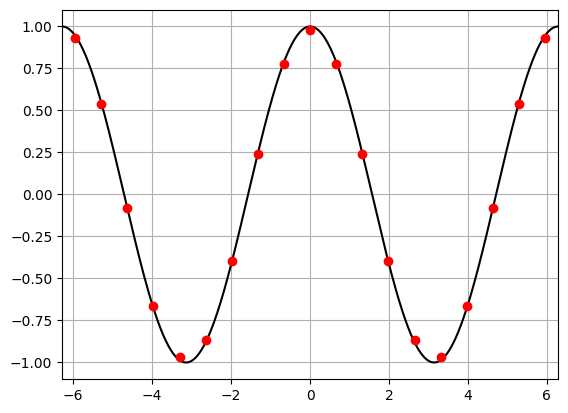

In [9]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_prime(x), 'k')
axes.plot(x_hat + 0.5 * delta_x, f_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-1.1, 1.1))
axes.grid()

plt.show()

#### Aside:  Computing Order of Convergence

Say we had the error $E(\Delta x)$ and we wanted to make a statement about the rate of convergence (note we can replace $E$ here with the $R$ from above).  Then we can do the following:
$$\begin{aligned}
    E(\Delta x) &= C \Delta x^n \\
    \log E(\Delta x) &= \log C + n \log \Delta x
\end{aligned}$$

The slope of the line is $n$ when modeling the error like this!  We can also match the first point by solving for $C$:

$$
    C = e^{\log E(\Delta x) - n \log \Delta x}
$$

<>:35: SyntaxWarning: invalid escape sequence '\i'
<>:35: SyntaxWarning: invalid escape sequence '\i'
<>:45: SyntaxWarning: invalid escape sequence '\D'
<>:46: SyntaxWarning: invalid escape sequence '\h'
<>:35: SyntaxWarning: invalid escape sequence '\i'
<>:35: SyntaxWarning: invalid escape sequence '\i'
<>:45: SyntaxWarning: invalid escape sequence '\D'
<>:46: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-4210543637.py:35: SyntaxWarning: invalid escape sequence '\i'
  error_type = ['$L^\infty$', 'offset $L^\infty$', '$L^1$', '$L^2$']
/tmp/ipython-input-4210543637.py:35: SyntaxWarning: invalid escape sequence '\i'
  error_type = ['$L^\infty$', 'offset $L^\infty$', '$L^1$', '$L^2$']
/tmp/ipython-input-4210543637.py:45: SyntaxWarning: invalid escape sequence '\D'
  axes.set_xlabel("$\Delta x$")
/tmp/ipython-input-4210543637.py:46: SyntaxWarning: invalid escape sequence '\h'
  axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")


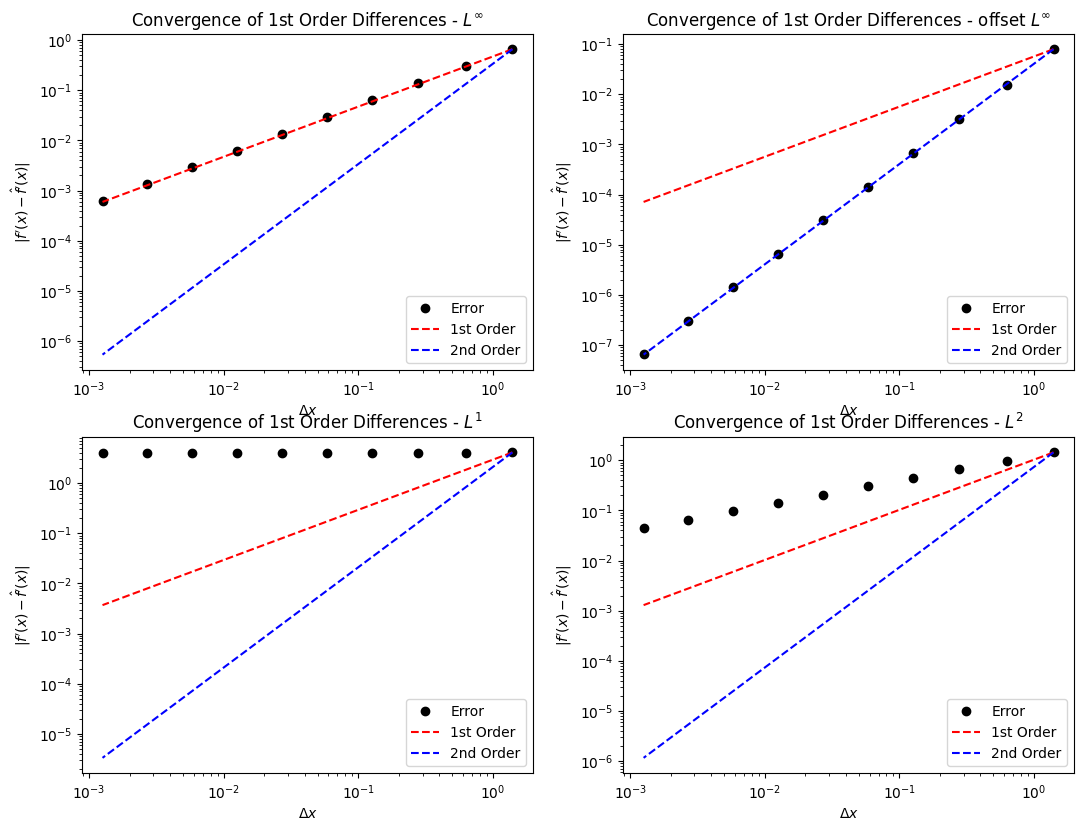

In [11]:
f = lambda x: numpy.sin(x)
f_prime = lambda x: numpy.cos(x)

# Compute the error as a function of delta_x
N_range = numpy.logspace(1, 4, 10, dtype=int)
delta_x = numpy.empty(N_range.shape)
error = numpy.empty((N_range.shape[0], 4))
for (i, N) in enumerate(N_range):
    x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
    delta_x[i] = x_hat[1] - x_hat[0]

    # Compute forward difference
    f_prime_hat = numpy.empty(x_hat.shape)
    f_prime_hat[:-1] = (f(x_hat[1:]) - f(x_hat[:-1])) / (delta_x[i])

    # Use first-order differences for points at edge of domain
    f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x[i]  # Backward Difference at x_N

    # The differences in error computations is interesting here.  Note that the L_\infty norm returns a single
    # point-wise like error where as the L_2 and L_1 are adding error up so they exhbit less convergence
    error[i, 0] = numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=numpy.inf)
    error[i, 1] = numpy.linalg.norm(numpy.abs(f_prime(x_hat + 0.5 * delta_x[i]) - f_prime_hat), ord=numpy.inf)
    error[i, 2] = numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=1)
    error[i, 3] = numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=2)

error = numpy.array(error)
delta_x = numpy.array(delta_x)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)
# plt.rc('legend', fontsize=6)
# plt.rc('font', size=6)

error_type = ['$L^\infty$', 'offset $L^\infty$', '$L^1$', '$L^2$']
for i in range(error.shape[1]):
    axes = fig.add_subplot(2, 2, i + 1)
    axes.loglog(delta_x, error[:, i], 'ko', label="Error")

    order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
    axes.loglog(delta_x, order_C(delta_x[0], error[0, i], 1.0) * delta_x**1.0, 'r--', label="1st Order")
    axes.loglog(delta_x, order_C(delta_x[0], error[0, i], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
    axes.legend(loc=4)
    axes.set_title("Convergence of 1st Order Differences - %s" % error_type[i])
    axes.set_xlabel("$\Delta x$")
    axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")

plt.show()

### Example 2: 2nd Order Centered Difference

Now lets use 3 points to calculate the 2nd order accurate finite-difference.  Consider the points $(x_{n}, y_{n})$, $(x_{n-1}, y_{n-1})$, and $(x_{n+1}, y_{n+1})$, from before we have

$$\begin{aligned}
    P_2(x) &= [f(x_0)] + (x - x_0) [f(x_0), f(x_1)] + (x - x_0)(x - x_1) [f(x_0), f(x_1), f(x_2)] \\
    &= f(x_0) + (x - x_0) \frac{f(x_1) - f(x_0)}{x_1 - x_0} + (x - x_0)(x - x_1) \left ( \frac{f(x_2) - f(x_1)}{(x_2 - x_1)(x_2 - x_0)} - \frac{f(x_1) - f(x_0)}{(x_1 - x_0)(x_2 - x_0)} \right )
\end{aligned}$$
Compute the formula for the derivative.  Assume that the distance between the $x_i$ are equal.

$$\begin{aligned}
    P_2'(x) &= [f(x_n), f(x_{n+1})] + ((x - x_n) + (x - x_{n+1})) [f(x_n), f(x_{n+1}), f(x_{n-1})] \\
    &= \frac{f(x_{n+1}) - f(x_n)}{x_{n+1} - x_n}  + ((x - x_n) + (x - x_{n+1}))\\ &* \left ( \frac{f(x_{n-1}) - f(x_{n+1})}{(x_{n-1} - x_{n+1})(x_{n-1} - x_n)} - \frac{f(x_{n+1}) - f(x_n)}{(x_{n+1} - x_n)(x_{n-1} - x_n)} \right )
\end{aligned}$$

Evaluating at $x_n$ and assuming the points $x_{n-1}, x_n, x_{n+1}$ are evenly spaced leads to

$$\begin{aligned}
    P_2'(x_n) &= \frac{f(x_{n+1}) - f(x_n)}{\Delta x} - \Delta x \left ( \frac{f(x_{n-1}) - f(x_{n+1})}{2\Delta x^2} + \frac{f(x_{n+1}) - f(x_n)}{\Delta x^2} \right ) \\
    &=\frac{f(x_{n+1}) - f(x_n)}{\Delta x} - \left ( \frac{f(x_{n+1}) - 2f(x_n) + f(x_{n-1})}{2\Delta x}\right ) \\
    &=\frac{2f(x_{n+1}) - 2f(x_n) - f(x_{n+1}) + 2f(x_n) - f(x_{n-1})}{2 \Delta x} \\
    &=\frac{f(x_{n+1}) - f(x_{n-1})}{2 \Delta x}
\end{aligned}$$

This finite-difference is second order accurate and is centered about the point it is meant to approximate ($x_n$).  We can show that it is second order by again considering the remainder term's derivative

$$\begin{aligned}
    R_2'(x) &= \left(\sum^{2}_{i=0} \left( \prod^{2}_{j=0,~j\neq i} (x - x_j) \right )\right ) \frac{f'''(c)}{3!} \\
    &= \left ( (x - x_{n+1}) (x - x_{n-1}) + (x-x_n) (x-x_{n-1}) + (x-x_n)(x-x_{n+1}) \right ) \frac{f'''(c)}{3!}
\end{aligned}$$

Again evaluating this expression at $x = x_n$ and assuming evenly space points we have

$$R_2'(x_n) = -\Delta x^2 \frac{f'''(c)}{3!}$$

showing that our error is $\mathcal{O}(\Delta x^2)$.

### Explanation of Example 2: 2nd Order Centered Difference

Example 2 introduces the **centered difference** formula, which is a more accurate way to approximate the first derivative of a function compared to the forward or backward differences from Example 1. This method uses three data points: the point where you want to approximate the derivative ($x_n$) and one point on either side ($x_{n-1}$ and $x_{n+1}$).

The formula derived in the notebook is:

$$f'(x_n) \approx \frac{f(x_{n+1}) - f(x_{n-1})}{2 \Delta x}$$

**Conceptual Idea:**

Unlike the forward or backward differences which use a secant line to one side of the point, the centered difference uses a secant line that spans *across* the point $x_n$. It connects the points $(x_{n-1}, f(x_{n-1}))$ and $(x_{n+1}, f(x_{n+1}))$.

Think of it as taking the average of the forward difference at $x_{n-1}$ and the backward difference at $x_{n+1}$. This balancing effect around the point $x_n$ is what leads to a more accurate approximation.

**Derivation (Conceptual):**

The notebook shows two ways to derive this formula:

1.  **Using the Interpolating Polynomial:** By finding the interpolating polynomial of degree 2 that passes through the three points $(x_{n-1}, y_{n-1})$, $(x_n, y_n)$, and $(x_{n+1}, y_{n+1})$ and then differentiating this polynomial and evaluating it at $x_n$.
2.  **Using Taylor Series Expansions:** By writing out the Taylor series expansions of $f(x_{n+1})$ and $f(x_{n-1})$ around $x_n$ and then combining them in a way that isolates $f'(x_n)$ and cancels out the lowest-order error terms. The notebook demonstrates that subtracting the Taylor series of $f(x_{n-1})$ from that of $f(x_{n+1})$ and dividing by $2\Delta x$ achieves this.

**Order of Accuracy:**

The centered difference formula is **second-order accurate**, meaning its error is proportional to $\Delta x^2$. As shown in the notebook's error analysis using the remainder term $R_2'(x_n)$, the error is $\mathcal{O}(\Delta x^2)$. This is a significant improvement over the first-order methods. If you halve the step size $\Delta x$, the error is expected to decrease by a factor of four ($\Delta x$ squared). This is why the centered difference is often preferred when possible.

In [12]:
f = lambda x: numpy.sin(x)
f_prime = lambda x: numpy.cos(x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 21
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]

# Compute derivative
f_prime_hat = numpy.empty(x_hat.shape)
f_prime_hat[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2. * delta_x)

# Use first-order differences for points at edge of domain
f_prime_hat[0] = (f(x_hat[1]) - f(x_hat[0])) / delta_x     # Forward Difference at x_0
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x  # Backward Difference at x_N
#f_prime_hat[0] = (-3.0 * f(x_hat[0]) + 4.0 * f(x_hat[1]) - f(x_hat[2])) / (2.0 * delta_x)
#f_prime_hat[-1] = (3.0 * f(x_hat[-1]) - 4.0 * f(x_hat[-2]) + f(x_hat[-3])) / (2.0 * delta_x)

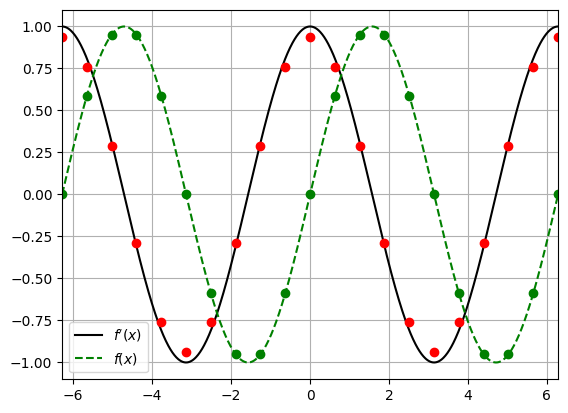

In [13]:
fig = plt.figure()
plt.rcdefaults()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_prime(x), 'k',label="$f'(x)$")
axes.plot(x_hat, f_prime_hat, 'ro')
axes.plot(x, f(x),'g--',label="$f(x)$")
axes.plot(x_hat, f(x_hat), 'go')
axes.set_xlim((x[0], x[-1]))
# axes.set_ylim((-1.1, 1.1))
axes.grid()
axes.legend()

plt.show()

<>:37: SyntaxWarning: invalid escape sequence '\D'
<>:38: SyntaxWarning: invalid escape sequence '\h'
<>:37: SyntaxWarning: invalid escape sequence '\D'
<>:38: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-4260401395.py:37: SyntaxWarning: invalid escape sequence '\D'
  axes.set_xlabel("$\Delta x$")
/tmp/ipython-input-4260401395.py:38: SyntaxWarning: invalid escape sequence '\h'
  axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")


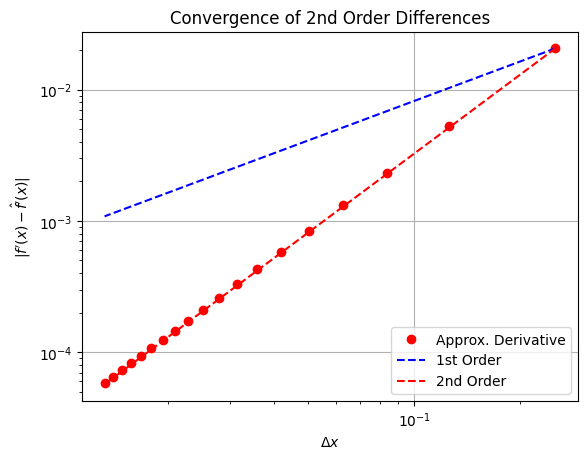

In [15]:
# Compute the error as a function of delta_x
delta_x = []
error = []
# for N in range(2, 101):
for N in range(50, 1000, 50):
    x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N + 1)
    delta_x.append(x_hat[1] - x_hat[0])

    # Compute derivative
    f_prime_hat = numpy.empty(x_hat.shape)
    f_prime_hat[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2 * delta_x[-1])

    # Use first-order differences for points at edge of domain
    f_prime_hat[0] = (f(x_hat[1]) - f(x_hat[0])) / delta_x[-1]
    f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x[-1]
    # Use second-order differences for points at edge of domain
    f_prime_hat[0] =  (-3.0 * f(x_hat[0])  +  4.0 * f(x_hat[1])  + - f(x_hat[2]))  / (2.0 * delta_x[-1])
    f_prime_hat[-1] = ( 3.0 * f(x_hat[-1]) + -4.0 * f(x_hat[-2]) +   f(x_hat[-3])) / (2.0 * delta_x[-1])

    # Compute Error
    error.append(numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=numpy.inf))
#     error.append(numpy.linalg.norm(numpy.abs(f_prime(x_hat) - f_prime_hat), ord=2))

error = numpy.array(error)
delta_x = numpy.array(delta_x)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error, "ro", label="Approx. Derivative")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'b--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'r--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence of 2nd Order Differences")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")
axes.grid()

plt.show()

### Example 3: Alternative Derivations

An alternative method for finding finite-difference formulas is by using Taylor series expansions about the point we want to approximate.  The Taylor series about $x_n$ is

$$f(x) = f(x_n) + (x - x_n) f'(x_n) + \frac{(x - x_n)^2}{2!} f''(x_n) + \frac{(x - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x - x_n)^4)$$

Say we want to derive the second order accurate, first derivative approximation that we just did, this requires the values $(x_{n+1}, f(x_{n+1})$ and $(x_{n-1}, f(x_{n-1})$.  We can express these values via our Taylor series approximation above as

\begin{aligned}
    f(x_{n+1}) &= f(x_n) + (x_{n+1} - x_n) f'(x_n) + \frac{(x_{n+1} - x_n)^2}{2!} f''(x_n) + \frac{(x_{n+1} - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x_{n+1} - x_n)^4) \\
\end{aligned}

or
\begin{aligned}
&= f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)
\end{aligned}

and

\begin{align}
f(x_{n-1}) &= f(x_n) + (x_{n-1} - x_n) f'(x_n) + \frac{(x_{n-1} - x_n)^2}{2!} f''(x_n) + \frac{(x_{n-1} - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x_{n-1} - x_n)^4)
\end{align}

\begin{align}
&= f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)
\end{align}

Or all together (for regularly spaced points),
\begin{align}
f(x_{n+1}) &= f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\\
f(x_{n-1})&= f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)
\end{align}

Now to find out how to combine these into an expression for the derivative we assume our approximation looks like

$$
    f'(x_n) + R(x_n) = A f(x_{n+1}) + B f(x_n) + C f(x_{n-1})
$$

where $R(x_n)$ is our error.  

Plugging in the Taylor series approximations we find

$$\begin{aligned}
    f'(x_n) + R(x_n) &= A \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right ) \\
    & + B f(x_n) \\
    & + C \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) \right )
\end{aligned}$$

Since we want $R(x_n) = \mathcal{O}(\Delta x^2)$ we want all terms lower than this to cancel except for those multiplying $f'(x_n)$ as those should sum to 1 to give us our approximation.  Collecting the terms with common evaluations of the derivatives on $f(x_n)$ we get a series of expressions for the coefficients $A$, $B$, and $C$ based on the fact we want an approximation to $f'(x_n)$.  The $n=0$ terms collected are $A + B + C$ and are set to 0 as we want the $f(x_n)$ term to also cancel.

$$\begin{aligned}
    f(x_n):&  &A + B + C &= 0 \\
    f'(x_n): & &A \Delta x - C \Delta x &= 1 \\
    f''(x_n): & &A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} &= 0
\end{aligned} $$

This last equation $\Rightarrow A = -C$, using this in the second equation gives $A = \frac{1}{2 \Delta x}$ and $C = -\frac{1}{2 \Delta x}$.  The first equation then leads to $B = 0$.  Putting this altogether then gives us our previous expression including an estimate for the error:

$$\begin{aligned}
    f'(x_n) + R(x_n) &= \quad \frac{1}{2 \Delta x} \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right ) \\
    & \quad + 0 \cdot f(x_n) \\
    & \quad - \frac{1}{2 \Delta x} \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) \right ) \\
    &=  f'(x_n) + \frac{1}{2 \Delta x} \left ( \frac{2 \Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right )
\end{aligned}$$
so that we find
$$
    R(x_n) = \frac{\Delta x^2}{3!} f'''(x_n) + \mathcal{O}(\Delta x^3) = \mathcal{O}(\Delta x^2)
$$

#### Another way...

There is one more way to derive the second order accurate, first order finite-difference formula.  Consider the two first order forward and backward finite-differences averaged together:

$$\frac{D_1^+(f(x_n)) + D_1^-(f(x_n))}{2} = \frac{f(x_{n+1}) - f(x_n) + f(x_n) - f(x_{n-1})}{2 \Delta x} = \frac{f(x_{n+1}) - f(x_{n-1})}{2 \Delta x}$$

### Explanation of Example 3: Alternative Derivations (using Taylor Series)

Example 3 presents an alternative and powerful method for deriving finite difference formulas: using **Taylor series expansions**. This approach is particularly useful because it directly reveals the order of accuracy of the resulting formula.

**The Core Idea:**

The Taylor series expansion allows us to represent the value of a function at a point $x$ in terms of the function's value and its derivatives at a nearby point $x_n$. The general form of a Taylor series expansion of $f(x)$ about $x_n$ is:

$$f(x) = f(x_n) + (x - x_n) f'(x_n) + \frac{(x - x_n)^2}{2!} f''(x_n) + \frac{(x - x_n)^3}{3!} f'''(x_n) + \cdots$$

If we consider points that are a fixed distance $\Delta x$ away from $x_n$ (i.e., $x_{n+1} = x_n + \Delta x$ and $x_{n-1} = x_n - \Delta x$), we can write the Taylor series expansions for $f(x_{n+1})$ and $f(x_{n-1})$ around $x_n$:

$$f(x_{n+1}) = f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)$$
$$f(x_{n-1}) = f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)$$

**Deriving the Formula:**

The goal is to find a linear combination of function values at nearby points (e.g., $A f(x_{n+1}) + B f(x_n) + C f(x_{n-1})$) that approximates the desired derivative (e.g., $f'(x_n)$). We plug the Taylor series expansions into this linear combination and then collect terms based on the derivatives of $f$ at $x_n$.

For example, to derive the second-order centered difference for the first derivative, we want:

$$A f(x_{n+1}) + B f(x_n) + C f(x_{n-1}) = f'(x_n) + \mathcal{O}(\Delta x^2)$$

By substituting the Taylor series and grouping terms by $f(x_n)$, $f'(x_n)$, $f''(x_n)$, etc., we get a system of linear equations for the coefficients $A$, $B$, and $C$. To achieve the desired order of accuracy, we set the coefficients of the lower-order error terms to zero and the coefficient of the desired derivative term to one.

In Example 3, for the first derivative, we set the coefficients of $f(x_n)$ and $f''(x_n)$ to zero and the coefficient of $f'(x_n)$ to one. Solving this system gives us the values for $A$, $B$, and $C$ that yield the centered difference formula:

$$A = \frac{1}{2 \Delta x}, \quad B = 0, \quad C = -\frac{1}{2 \Delta x}$$

Substituting these back gives the formula:

$$f'(x_n) \approx \frac{1}{2 \Delta x} f(x_{n+1}) + 0 \cdot f(x_n) - \frac{1}{2 \Delta x} f(x_{n-1}) = \frac{f(x_{n+1}) - f(x_{n-1})}{2 \Delta x}$$

**Why this makes sense:**

This method essentially finds the unique linear combination of function values at the chosen points that provides the best possible approximation of the desired derivative for a given order of accuracy. By carefully choosing the points and the linear combination, we can cancel out lower-order error terms in the Taylor series expansions, resulting in a higher-order accurate finite difference formula.

Example 3 also shows that the centered difference formula can be seen as the average of the forward and backward differences, providing an intuitive connection between the first and second-order methods.

### Example 4: Higher Order Derivatives

Using our Taylor series approach lets derive the second order accurate second derivative formula.  Again we will use the same points and the Taylor series centered at $x = x_n$ so we end up with the same expression as before:

$$\begin{aligned}
    f''(x_n) + R(x_n) &= \quad A \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5)\right ) \\
    &+ \quad B \cdot f(x_n) \\
    &+ \quad C \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5) \right )
\end{aligned}$$

except this time we want to leave $f''(x_n)$ on the right hand side.  

Try out the same trick as before and see if you can setup the equations that need to be solved.

Doing the same trick as before we have the following expressions:

$$\begin{aligned}
    f(x_n): & & A + B + C &= 0\\
    f'(x_n): & & A \Delta x - C \Delta x &= 0\\
    f''(x_n): & & A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} &= 1
\end{aligned}$$

The second equation implies $A = C$ which combined with the third implies

$$A = C = \frac{1}{\Delta x^2}$$

Finally the first equation gives

$$B = -\frac{2}{\Delta x^2}$$

leading to the final expression

$$\begin{aligned}
    f''(x_n) + R(x_n) &= \quad \frac{1}{\Delta x^2} \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5)\right ) \\
    &+ \quad -\frac{2}{\Delta x^2} \cdot f(x_n) \\
    &+ \quad \frac{1}{\Delta x^2} \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5) \right ) \\
    &= f''(x_n) + \frac{1}{\Delta x^2} \left(\frac{2 \Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5) \right )
\end{aligned}
$$
so that

$$
    R(x_n) = \frac{\Delta x^2}{12} f^{(4)}(x_n) + \mathcal{O}(\Delta x^3)
$$

### Explanation of Example 4: Higher Order Derivatives (Second Derivative)

Example 4 extends the Taylor series method from Example 3 to derive a finite difference formula for a **higher-order derivative**, specifically the second derivative. The goal is to find a linear combination of function values at nearby points that approximates the second derivative $f''(x_n)$.

**The Setup:**

Similar to Example 3, we start with the Taylor series expansions of $f(x_{n+1})$ and $f(x_{n-1})$ around $x_n$:

$$f(x_{n+1}) = f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5)$$
$$f(x_{n-1}) = f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \frac{\Delta x^4}{4!} f^{(4)}(x_n) + \mathcal{O}(\Delta x^5)$$

We are looking for a linear combination of the form $A f(x_{n+1}) + B f(x_n) + C f(x_{n-1})$ that approximates $f''(x_n)$ to a certain order of accuracy.

**Deriving the Formula:**

We substitute the Taylor series expansions into the linear combination and group terms by the derivatives of $f$ at $x_n$:

$$A f(x_{n+1}) + B f(x_n) + C f(x_{n-1}) = f''(x_n) + R(x_n)$$

where $R(x_n)$ is the remainder (error). To obtain a second-order accurate approximation for the second derivative, we need to set up a system of equations for $A$, $B$, and $C$ such that:

1.  The coefficient of $f(x_n)$ is 0.
2.  The coefficient of $f'(x_n)$ is 0.
3.  The coefficient of $f''(x_n)$ is 1.
4.  The coefficients of higher-order terms ($f'''(x_n)$, etc.) determine the order of the error.

From the Taylor series expansions, collecting terms leads to the system of equations shown in the notebook:

$$\begin{aligned}
f(x_n): & & A + B + C &= 0\\
f'(x_n): & & A \Delta x - C \Delta x &= 0\\
f''(x_n): & & A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} &= 1
\end{aligned}$$

Solving this system:

*   The second equation ($A \Delta x - C \Delta x = 0$) implies $A = C$ (assuming $\Delta x \neq 0$).
*   Substituting $A=C$ into the third equation ($A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} = 1$) gives $2A \frac{\Delta x^2}{2} = 1$, so $A \Delta x^2 = 1$, which means $A = \frac{1}{\Delta x^2}$. Since $A=C$, $C = \frac{1}{\Delta x^2}$.
*   Substituting $A$ and $C$ into the first equation ($A + B + C = 0$) gives $\frac{1}{\Delta x^2} + B + \frac{1}{\Delta x^2} = 0$, so $B = -\frac{2}{\Delta x^2}$.

Substituting these values of $A$, $B$, and $C$ back into the linear combination gives the second-order accurate centered difference formula for the second derivative:

$$f''(x_n) \approx \frac{1}{\Delta x^2} f(x_{n+1}) - \frac{2}{\Delta x^2} f(x_n) + \frac{1}{\Delta x^2} f(x_{n-1}) = \frac{f(x_{n+1}) - 2 f(x_n) + f(x_{n-1})}{\Delta x^2}$$

**Error Term:**

By substituting the Taylor series back in with the calculated coefficients, the notebook shows that the lowest-order term that does *not* cancel is the one involving $f^{(4)}(x_n)$ and $\Delta x^2$. This confirms that the error is $\mathcal{O}(\Delta x^2)$, making this a second-order accurate approximation for the second derivative.

In [16]:
f = lambda x: numpy.sin(x)
f_dubl_prime = lambda x: -numpy.sin(x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 40
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]



# Compute derivative
f_dubl_prime_hat = numpy.empty(x_hat.shape)
f_dubl_prime_hat[1:-1] = (f(x_hat[2:]) -2.0 * f(x_hat[1:-1]) + f(x_hat[:-2])) / (delta_x**2)

# Use first-order differences for points at edge of domain
f_dubl_prime_hat[0] = (2.0 * f(x_hat[0]) - 5.0 * f(x_hat[1]) + 4.0 * f(x_hat[2]) - f(x_hat[3])) / delta_x**2
f_dubl_prime_hat[-1] = (2.0 * f(x_hat[-1]) - 5.0 * f(x_hat[-2]) + 4.0 * f(x_hat[-3]) - f(x_hat[-4])) / delta_x**2

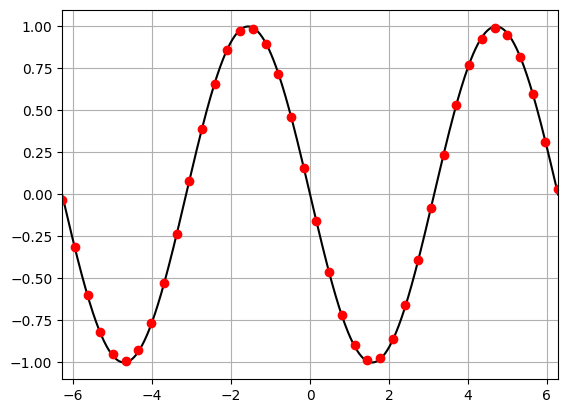

In [17]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_dubl_prime(x), 'k')
axes.plot(x_hat, f_dubl_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-1.1, 1.1))
axes.grid()

plt.show()

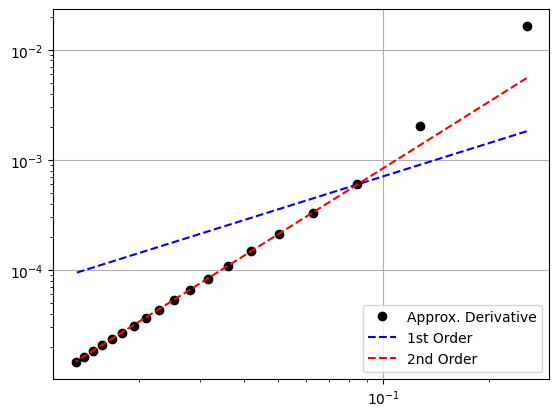

In [18]:
f = lambda x: numpy.sin(x)
f_dubl_prime = lambda x: -numpy.sin(x)

# Compute the error as a function of delta_x
delta_x = []
error = []
# for N in xrange(2, 101):
for N in range(50, 1000, 50):
    x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
    delta_x.append(x_hat[1] - x_hat[0])

    # Compute derivative
    f_dubl_prime_hat = numpy.empty(x_hat.shape)
    f_dubl_prime_hat[1:-1] = (f(x_hat[2:]) -2.0 * f(x_hat[1:-1]) + f(x_hat[:-2])) / (delta_x[-1]**2)

    # Use second-order differences for points at edge of domain
    f_dubl_prime_hat[0] = (2.0 * f(x_hat[0]) - 5.0 * f(x_hat[1]) + 4.0 * f(x_hat[2]) - f(x_hat[3])) / delta_x[-1]**2
    f_dubl_prime_hat[-1] = (2.0 * f(x_hat[-1]) - 5.0 * f(x_hat[-2]) + 4.0 * f(x_hat[-3]) - f(x_hat[-4])) / delta_x[-1]**2

    error.append(numpy.linalg.norm(numpy.abs(f_dubl_prime(x_hat) - f_dubl_prime_hat), ord=numpy.inf))

error = numpy.array(error)
delta_x = numpy.array(delta_x)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

# axes.plot(delta_x, error)
axes.loglog(delta_x, error, "ko", label="Approx. Derivative")
order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[2], error[2], 1.0) * delta_x**1.0, 'b--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[2], error[2], 2.0) * delta_x**2.0, 'r--', label="2nd Order")
axes.legend(loc=4)
axes.grid()

plt.show()